# Depending on Boss how much pierce do i need ?

In [171]:
from math import floor , ceil
import pandas as pd


In [172]:
# some player stat
player = {
    "level" : 295,
       
    "base ATK" : 5000,
    "total ATK%" : 50,
    "total Physical Pierce" : 0,
 
    "base MATK": 100,
    "total MATK%": 0,
    "total Magic Pierce" : 0
}
player["total ATK"] = floor(player["base ATK"] * (100 + player["total ATK%"])/100)
player["total MATK"] = floor(player["base MATK"] * (100 + player["total MATK%"])/100)

player

{'level': 295,
 'base ATK': 5000,
 'total ATK%': 50,
 'total Physical Pierce': 0,
 'base MATK': 100,
 'total MATK%': 0,
 'total Magic Pierce': 0,
 'total ATK': 7500,
 'total MATK': 100}

In [173]:
# monster stat
monster = {
    "level" : 125,
    "DEF" : 5500,
    "physical resistance" : 10,
    "MDEF" : 5500,
    "magic resistance" : 10
}

In [174]:
def base_dmg (player= player , target = monster):
    # physical base dmg
    base_physical_dmg = (player["total ATK"] + player["level"] + 1 - target["level"]) * (100 - target["physical resistance"]  )/100
    # magic base dmg
    base_magic_dmg = (player["total MATK"] + player["level"] + 1 - target["level"]) * (100 - target["magic resistance"]  )/100

    return { "physical" : base_physical_dmg , "magic" : base_magic_dmg }

In [175]:
def effective_target_defense (player= player , target = monster) :
    effectiv_DEF = target["DEF"] *  (100 - player["total Physical Pierce"])/100
    effectiv_MDEF = target["MDEF"] *  (100 - player["total Magic Pierce"])/100
    
    return { "physical" : effectiv_DEF , "magic" : effectiv_MDEF }

In [176]:
def effective_atk (player= player , target = monster) :
    physical = floor(base_dmg (player , target)["physical"] - effective_target_defense (player , target)["physical"])
    magic = floor(base_dmg (player , target)["magic"] - effective_target_defense (player , target)["magic"])
    
    return { "physical" : physical , "magic" : magic }

In [177]:
effective_atk(player,monster)

{'physical': 1403, 'magic': -5257}

In [178]:
data_atk_pierce = pd.DataFrame(columns=['Physical Pierce', 'Effective Physical ATK']) 
for pierce in range (0,100+1):
    player["total Physical Pierce"] = pierce
    
    new_row = pd.DataFrame([[pierce, effective_atk(player,monster)["physical"]]], columns=['Physical Pierce', 'Effective Physical ATK'])
    data_atk_pierce = pd.concat([data_atk_pierce, new_row], ignore_index=True)

<Axes: xlabel='Physical Pierce'>

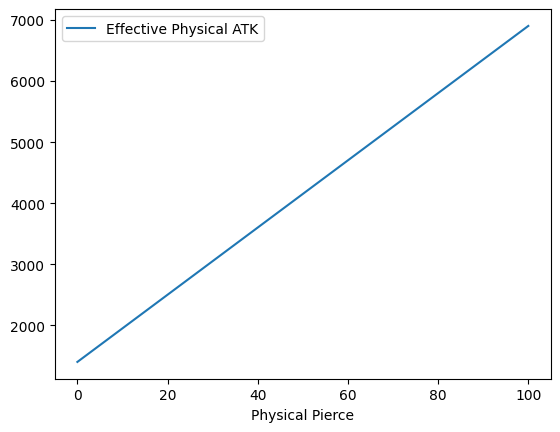

In [179]:
data_atk_pierce.plot(x="Physical Pierce",y='Effective Physical ATK')

In [180]:
data_atk_pierce

,Physical Pierce,Effective Physical ATK
0,0,1403
1,1,1458
2,2,1513
3,3,1568
4,4,1623
...,...,...
96,96,6683
97,97,6738
98,98,6793
99,99,6848


# seeing like that of course max pierce = max possible damage

here we need to define the elasticity pierce/dmg

or the dmg you accept to lost due to boss def


In [181]:
# the amount of boss def you accept
acceptable_boss_def = 500

In [182]:
def pierce_need_based_on_acceptable_boss_def (target = monster , acceptable_boss_def = acceptable_boss_def):
    
    physical_pierce_needed = ceil( 100 - ((acceptable_boss_def * 100)/target["DEF"] ))
    magic_pierce_needed =  ceil (100 - ((acceptable_boss_def * 100)/target["MDEF"] ))
    
    return { "physical" : physical_pierce_needed , "magic" : magic_pierce_needed }
    

In [183]:
pierce_need_based_on_acceptable_boss_def(monster,acceptable_boss_def=500)

{'physical': 91, 'magic': 91}

In [184]:
# the percentage of dmg you accept to lost due to boss def
acceptable_dmg_loss_from_boss_def = 5

def pierce_need_based_on_acceptable_dmg_loss_from_boss_def (player = player,target = monster , acceptable_dmg_loss_from_boss_def = acceptable_dmg_loss_from_boss_def):
    # physical 
    physical_pierce_needed = 0
    for pierce in range (0,100+1):
        player["total Physical Pierce"] = pierce
        physical_pierce_needed = pierce
        baseDmg = base_dmg(player,target)["physical"]
        effectiveAtk = effective_atk(player,target)["physical"]  
        dmg_lost = ((baseDmg - effectiveAtk)/baseDmg ) * 100
        
        if  dmg_lost <= acceptable_dmg_loss_from_boss_def :
            break
    # magic 
    magic_pierce_needed = 0
    for pierce in range (0,100+1):
        player["total Magic Pierce"] = pierce
        magic_pierce_needed = pierce
        baseDmg = base_dmg(player,target)["magic"]
        effectiveAtk = effective_atk(player,target)["magic"]  
        dmg_lost = ((baseDmg - effectiveAtk)/baseDmg ) * 100
        
        if  dmg_lost <= acceptable_dmg_loss_from_boss_def :
            break
    
    
    return { "physical" : physical_pierce_needed , "magic" : magic_pierce_needed }

In [185]:
pierce_need_based_on_acceptable_dmg_loss_from_boss_def(player,monster,15)

{'physical': 82, 'magic': 100}

# Now play with it Sey !

In [186]:
# player stat
player = {
    "level" : 295,
       
    "base ATK" : 5000,
    "total ATK%" : 50,
    "total Physical Pierce" : 0,
 
    "base MATK": 100,
    "total MATK%": 0,
    "total Magic Pierce" : 0
}
player["total ATK"] = floor(player["base ATK"] * (100 + player["total ATK%"])/100)
player["total MATK"] = floor(player["base MATK"] * (100 + player["total MATK%"])/100)

In [187]:
# monster stat
monster = {
    "level" : 294,
    "DEF" : 4388,
    "physical resistance" : 10,
    "MDEF" : 5500,
    "magic resistance" : 10
}

In [188]:
#acceptable_boss_def = 100 mean u accept that boss has max 100 def
pierce_need_based_on_acceptable_boss_def(monster,acceptable_boss_def=500)

{'physical': 91, 'magic': 91}

In [189]:
#acceptable_dmg_loss_from_boss_def = 10 mean u accept to loose 10% of ur basedmg due to boss def

pierce_need_based_on_acceptable_dmg_loss_from_boss_def(player,monster,acceptable_dmg_loss_from_boss_def=10)

{'physical': 88, 'magic': 100}

In [190]:
1097*4

4388